In [1]:
# Importations

# Modules intégrés
import math
import matplotlib.pyplot as plt

# Importations depuis Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.primitives import StatevectorSampler
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_distribution
 
# Importations depuis Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler

# Afficher les graphiques directement dans le Jupyter Notebook
%matplotlib inline

# Circuit GHZ

## Création du circuit GHZ

In [2]:
qc_ghz = QuantumCircuit(3, 3)

qc_ghz.h(0)      # Hadamard sur le qubit 0

qc_ghz.cx(0, 1)   # CNOT 0→1

qc_ghz.cx(1, 2)   # CNOT 1→2

qc_ghz.barrier() # Barrière pour séparer la préparation de l'état de la mesure

qc_ghz.measure_all()

## Dessine le circuit

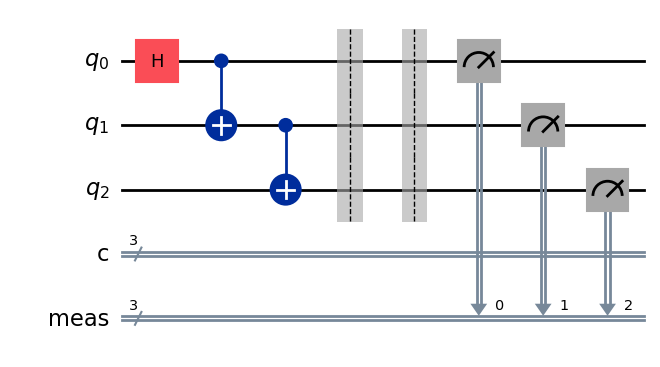

In [20]:
fig = qc_ghz.draw('mpl')

## Histogramme de mesure (qasm_simulator)

Counts GHZ: {'111 000': 475, '000 000': 549}


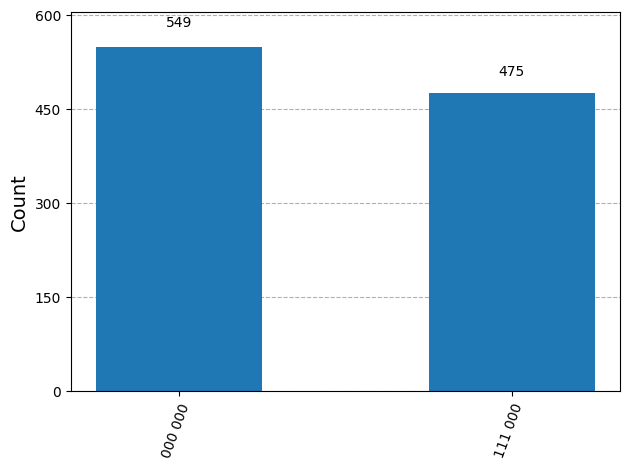

In [4]:
backend_qasm = Aer.get_backend('qasm_simulator')
qc_ghz_t = transpile(qc_ghz, backend_qasm)
job_ghz = backend_qasm.run(qc_ghz_t, shots=1024)
result_ghz = job_ghz.result()
counts_ghz = result_ghz.get_counts()
print("Counts GHZ:", counts_ghz)

plot_histogram(counts_ghz)
plt.show()

# circuit W

## Création du circuit W

In [5]:
qc_w = QuantumCircuit(3, 3)

phi = 2 * math.acos(1 / math.sqrt(3))

qc_w.ry(phi, 0)
qc_w.ch(0, 1)
qc_w.cx(1, 2)
qc_w.cx(0, 1)
qc_w.x(0)

qc_w.barrier() # Barrière pour séparer la préparation de l'état de la mesure

qc_w.measure_all()

## Dessine le circuit

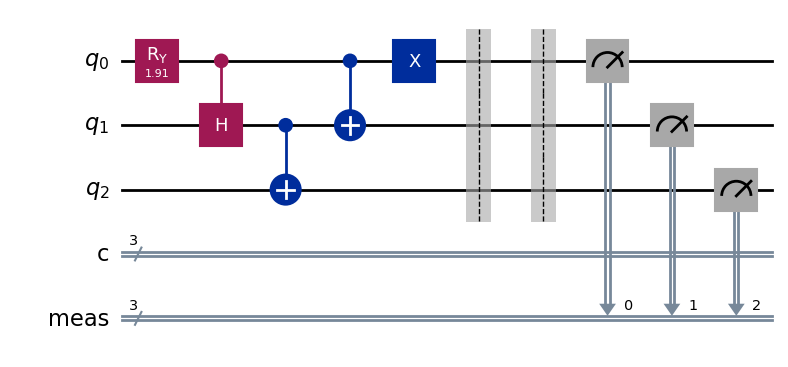

In [19]:
fig = qc_w.draw('mpl')

## Histogramme de mesure (qasm_simulator)

Counts W: {'100 000': 351, '001 000': 339, '010 000': 334}


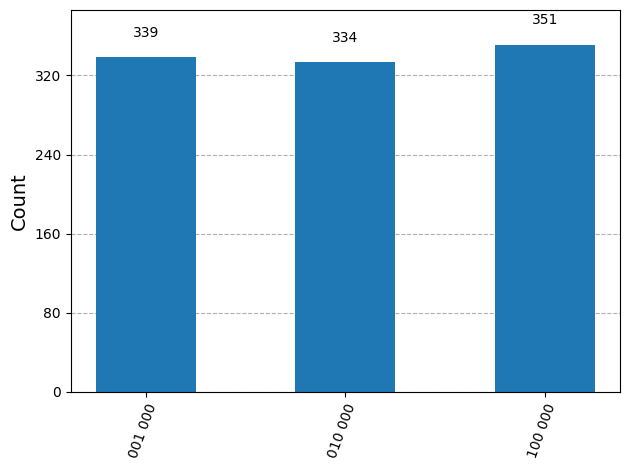

In [7]:
qc_w_t = transpile(qc_w, backend_qasm)
job_w = backend_qasm.run(qc_w_t, shots=1024)
result_w = job_w.result()
counts_w = result_w.get_counts()
print("Counts W:", counts_w)

plot_histogram(counts_w)
plt.show()

# Exécution sur un backend réel IBM Quantum

## Sélection du backend

In [8]:
# Sélectionnez du backend avec le moins de tâches en attente
service = QiskitRuntimeService()
backend = service.least_busy(
    operational=True, simulator=False, min_num_qubits=3
)
backend.name

qiskit_runtime_service.__init__:WARNING:2026-01-04 14:09:05,485: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:WARNING:2026-01-04 14:09:06,258: Loading instance: open-instance, plan: open
qiskit_runtime_service.backends:WARNING:2026-01-04 14:09:10,503: Using instance: open-instance, plan: open


'ibm_fez'

## Exécution en utilisant les primitives Qiskit

In [9]:
sampler = Sampler(mode=backend)
sampler.options.default_shots = 10_000

### Cicuit GHZ

In [10]:
# Transpiler qc_ghz pour le backend sélectionné
qc_ghz_isa = transpile(qc_ghz, backend=backend, optimization_level=3)

In [11]:
# Exécution
result_ghz = sampler.run([qc_ghz_isa]).result()

In [12]:
# Récupère les counts
dist_ghz = result_ghz[0].data.meas.get_counts()

### Circuit W

In [13]:
# Transpiler qc_ghz pour le backend sélectionné
qc_w_isa = transpile(qc_w, backend=backend, optimization_level=3)

In [14]:
# Exécution
result_w = sampler.run([qc_w_isa]).result()

In [15]:
# Récupère les counts
dist_w = result_w[0].data.meas.get_counts()

## Post-traitement et retour du résultat au format classique souhaité

### Cicuit GHZ

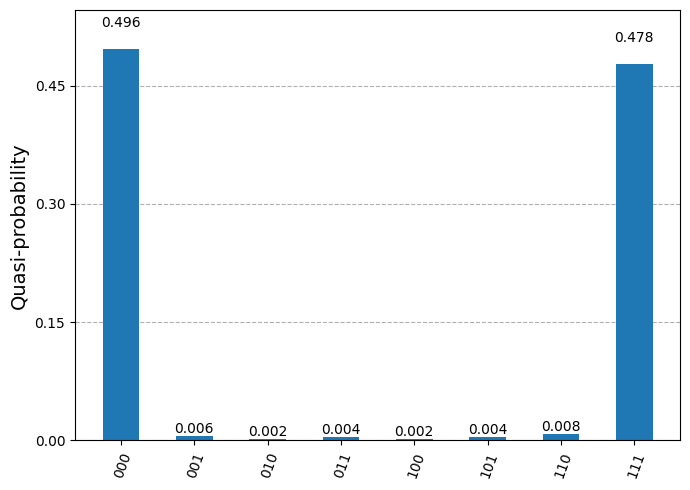

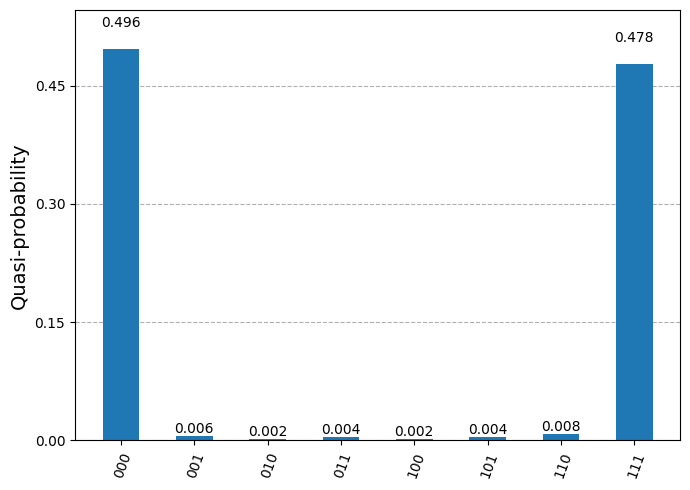

In [16]:
plot_distribution(dist_ghz)

### Circuit W

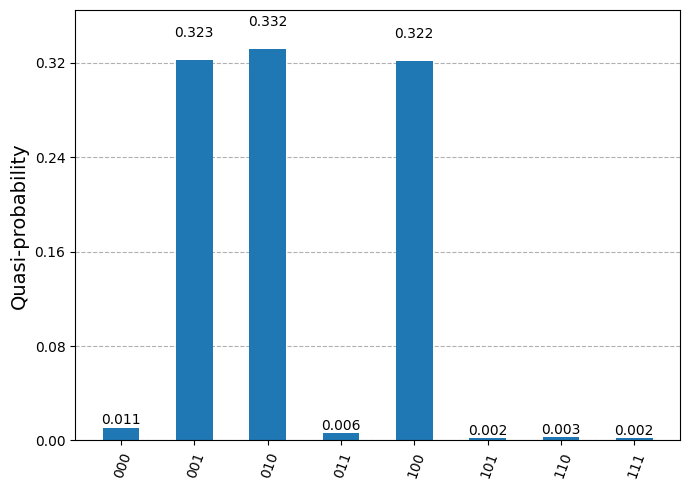

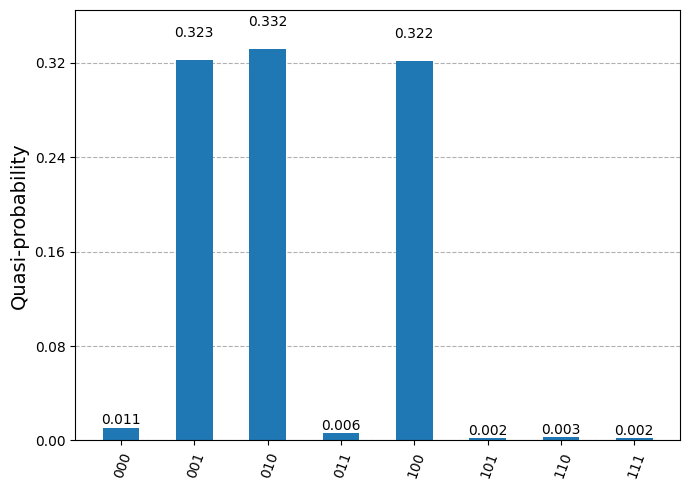

In [17]:
plot_distribution(dist_w)